In [1]:
import pandas as pd
data=pd.read_csv('../summary_data/table1_final.csv')
#data=pd.read_csv('../raw_data/Tool_Info.csv')
# Creating new columns that combine rarer types
data.loc[data.loc[:,'indexing'] == 'hashing', 'index'] = 'Hashing'
data.loc[data.loc[:,'indexing'] == 'BWT-FM', 'index'] = 'BWT-FM'
data.loc[data.loc[:,'indexing'] == 'BWT-FM + hashing', 'index'] = 'BWT-FM & Hashing'
data.loc[data.loc[:,'indexing'] == 'suffix array', 'index'] = 'Other Suffix'
data.loc[data.loc[:,'indexing'] == 'BWT-ST', 'index'] = 'Other Suffix'
data.loc[data.loc[:,'indexing'] == 'BWT', 'index'] = 'Other Suffix'
data.loc[data.loc[:,'indexing'] == 'suffix tree', 'index'] = 'Other Suffix'

data.loc[data.loc[:,'pairwise_alignment'] == 'SW', 'pairwise'] = 'Smith-Waterman'
data.loc[data.loc[:,'pairwise_alignment'] == 'HD', 'pairwise'] = 'Hamming Distance'
data.loc[data.loc[:,'pairwise_alignment'] == 'NW', 'pairwise'] = 'Needleman-Wunsch'
data.loc[data.loc[:,'pairwise_alignment'] == 'Non-DP Heuristic', 'pairwise'] = 'Non-DP Heuristic'
data.loc[data.loc[:,'pairwise_alignment'] == 'SW & NW', 'pairwise'] = 'Multiple Methods'
data.loc[data.loc[:,'pairwise_alignment'] == 'SW and NW', 'pairwise'] = 'Multiple Methods'
data.loc[data.loc[:,'pairwise_alignment'] == 'SW & Semi-Global', 'pairwise'] = 'Multiple Methods'
data.loc[data.loc[:,'pairwise_alignment'] == 'SW and Semi-Global', 'pairwise'] = 'Multiple Methods'
data.loc[data.loc[:,'pairwise_alignment'] == 'Rabin-Karp Algorithm', 'pairwise'] = 'Other DP'
data.loc[data.loc[:,'pairwise_alignment'] == 'Landau-Vishkin', 'pairwise'] = 'Other DP'
data.loc[data.loc[:,'pairwise_alignment'] == 'Sparse DP', 'pairwise'] = 'Other DP'
data.loc[data.loc[:,'pairwise_alignment'] == 'Banded Myers Bit Vector', 'pairwise'] = 'Other DP'
data.loc[data.loc[:,'pairwise_alignment'] == 'Myers Bit-Vector', 'pairwise'] = 'Other DP'
data.loc[data.loc[:,'pairwise_alignment'] == 'Semi-Global', 'pairwise'] = 'Other DP'

data.loc[data.loc[:,'fix_length_seed'] == 'Y', 'seeds_fixed'] = 'Yes'
data.loc[data.loc[:,'fix_length_seed'] == 'N', 'seeds_fixed'] = 'No'

data.loc[data.loc[:,'seed_chaining'] == 'Y', 'seeds_chained'] = 'Yes'
data.loc[data.loc[:,'seed_chaining'] == 'N', 'seeds_chained'] = 'No'

data.loc[data.loc[:,'spaced_seed'] == 'Y', 'seeds_spaced'] = 'Yes'
data.loc[data.loc[:,'spaced_seed'] == 'N', 'seeds_spaced'] = 'No'

data_year = pd.DataFrame(data.loc[:,['year_of_pub', 'aligner', 'application', 'index', 
                        'pairwise', 'seeds_fixed', 'seeds_spaced', 'seeds_chained']])
data_year.loc[:,'aligner_lower'] = data_year.loc[:,'aligner'].str.lower()

data.head()

,aligner,url,year_of_pub,application,indexing,fix_length_seed,spaced_seed,seed_chaining,pairwise_alignment,wrapper,max_read_length_tested,index,pairwise,seeds_fixed,seeds_chained,seeds_spaced
0,FASTA,https://fasta.bioch.virginia.edu/fasta_www2/fa...,1988,DNA/Protein,hashing,Y,N,Y,SW and NW,N,1500,Hashing,Multiple Methods,Yes,Yes,No
1,BLAST,https://blast.ncbi.nlm.nih.gov/Blast.cgi,1990,DNA/Protein,hashing,Y,N,Y,Non-DP Heuristic,N,73360,Hashing,Non-DP Heuristic,Yes,Yes,No
2,Gapped BLAST,https://blast.ncbi.nlm.nih.gov/Blast.cgi,1997,DNA/Protein,hashing,Y,N,Y,SW,N,246,Hashing,Smith-Waterman,Yes,Yes,No
3,SSAHA,https://www.sanger.ac.uk/science/tools/ssaha,2001,DNA,hashing,Y,N,N,NW,N,500,Hashing,Needleman-Wunsch,Yes,No,No
4,PatternHunter,https://www.bioinfor.com/,2002,DNA,hashing,Y,Y,Y,Non-DP heuristic,N,500,Hashing,NaN,Yes,Yes,Yes


In [2]:
rt = pd.read_csv('../raw_data/compare.tools.runtime.hours.csv')
mem = pd.read_csv('../raw_data/compare.tools.memory.csv')
rt

,Tools,ERR009309,ERR013127,ERR013138,ERR045708,ERR050158,ERR162843,ERR181410,ERR183377,SRR061640,SRR360549
0,Bowtie2,2.364914,4.442126,6.125343,9.481851,4.480202,6.579199,5.183426,4.279699,2.942086,3.852528
1,Bowtie,3.358317,5.825385,8.749844,12.251328,6.041617,7.729104,5.987389,4.563028,1.797393,4.718723
2,BWA,4.048227,6.964193,8.374950,10.337639,5.155173,7.040740,6.394736,4.827655,3.171607,6.078192
3,ERNE,2.066056,5.475683,9.406134,13.734103,8.755687,NaN,11.730733,8.590035,7.333813,7.445680
4,gsnap,18.782465,29.469896,40.606409,34.717148,11.450009,17.150793,16.579589,13.286443,10.444190,16.757750
5,hisat2,0.582257,2.636554,1.459196,1.739013,0.778033,1.107651,0.944994,0.820202,0.604172,0.915061
6,last,10.140177,16.316454,27.292700,27.709176,23.393876,34.322943,17.217662,14.567814,13.563960,17.689251
7,minialign,0.313215,0.566368,0.819447,0.891706,0.583020,0.652190,0.527590,0.458159,0.416982,0.510133
8,minimap2,0.955566,1.781175,3.408856,2.273320,1.625731,2.278983,1.980141,1.624609,1.086941,1.648935
9,mummer,6.545673,10.416824,10.920451,11.810404,7.216011,9.134470,8.296894,6.562281,7.873703,9.894749


In [3]:
rt.loc[:,'tools_lower'] = rt.loc[:,'Tools'].str.lower()
rtyear = pd.merge(rt, data_year, left_on='tools_lower', right_on='aligner_lower', how='inner')
rtyear.loc[:,'average_runtime'] = rtyear.iloc[:,1:11].mean(axis=1)
rtyear.loc[:,'std_dev'] = rtyear.iloc[:,1:11].std(axis=1)

# Imputing the one missing value
rtyear.loc[3,'ERR162843'] = rtyear.loc[3,'average_runtime'] 

# Only compare tools with DNA application
rtyear = rtyear.loc[rtyear.loc[:,'application'] != 'RNA-Seq'].reset_index(drop=True)

# Bowtie2 can be run in global or local, our data was generated using Needleman-Wunsch (Global)
rtyear.loc[rtyear.loc[:,'Tools'] == 'Bowtie2','pairwise'] = 'Needleman-Wunsch'
rtyear.loc[rtyear.loc[:,'Tools'] == 'last','pairwise'] = 'Smith-Waterman'
rtyear_summ = rtyear.loc[:,['aligner', 'year_of_pub', 'average_runtime', 'std_dev', 'application', 
                            'index', 'pairwise', 'seeds_fixed', 'seeds_spaced', 'seeds_chained']]
#rtyear_summ.sort_values(by=['year_of_pub'], inplace=True)
for i in range(0,11):
    if rtyear.loc[i,'year_of_pub'] < 2013:
        rtyear.loc[i,'year_split'] = 'Before 2013'  
    else:
        rtyear.loc[i,'year_split'] = '2013 and later'
rtyear_melt = pd.melt(rtyear, id_vars = ['aligner', 'year_split', 'application', 'index', 'pairwise'], 
        value_vars = ['ERR009309', 'ERR013127', 'ERR013138', 'ERR045708', 'ERR050158', 'ERR162843', 'ERR181410',
                     'ERR183377', 'SRR061640', 'SRR360549'], value_name = 'runtime')
rtyear.to_csv(path_or_buf='../summary_data/runtime_comparison_with_tool_info.csv')
rtyear_summ

,aligner,year_of_pub,average_runtime,std_dev,application,index,pairwise,seeds_fixed,seeds_spaced,seeds_chained
0,Bowtie2,2012,4.973137,2.040406,DNA,BWT-FM,Needleman-Wunsch,Yes,No,Yes
1,Bowtie,2009,6.102213,2.942134,DNA,BWT-FM,Hamming Distance,Yes,No,No
2,BWA,2009,6.239311,2.106996,DNA,BWT-FM,Other DP,No,No,No
3,GSNAP,2010,20.924469,10.347573,DNA,Hashing,Non-DP Heuristic,Yes,No,Yes
4,HISAT2,2019,1.158713,0.634037,DNA,BWT-FM,Non-DP Heuristic,Yes,No,No
5,LAST,2011,20.221401,7.627339,DNA/BS-Seq/protein/RNA,Other Suffix,Smith-Waterman,No,Yes,No
6,minimap2,2018,1.866426,0.694104,DNA/RNA-Seq,Hashing,Needleman-Wunsch,Yes,No,Yes
7,RMAP,2008,12.950420,4.114427,DNA,Hashing,Hamming Distance,Yes,No,No
8,SMALT,2010,32.163790,14.049867,DNA,Hashing,Smith-Waterman,Yes,No,Yes
9,SNAP,2011,1.165595,0.387181,DNA,Hashing,Needleman-Wunsch,Yes,No,No


In [4]:
mem.loc[:,'tools_lower'] = mem['Tools'].str.lower()
memyear = pd.merge(mem, data_year, left_on='tools_lower', right_on='aligner_lower', how='inner')
memyear.loc[:,'average_memory'] = memyear.iloc[:,1:11].mean(axis=1)
memyear = memyear.loc[memyear.loc[:,'application'] != 'RNA-Seq'].reset_index(drop=True)
memyear.loc[memyear.loc[:,'Tools'] == 'Bowtie2','pairwise'] = 'Needleman-Wunsch'
memyear.loc[memyear.loc[:,'Tools'] == 'last','pairwise'] = 'Smith-Waterman'

memyear_summ = memyear.loc[:,['aligner', 'year_of_pub', 'average_memory', 'application', 'index', 
                             'pairwise','seeds_fixed','seeds_spaced', 'seeds_chained',]]
#memyear_summ.sort_values(by=['year_of_pub'], inplace=True)
for i in range(0,11):
    memyear.loc[i,'year_split'] = 'Before 2013' if memyear.loc[i,'year_of_pub'] < 2013 else '2013 and later'
    
memyear_melt = pd.melt(memyear, id_vars = ['aligner', 'year_split', 'application', 'index', 'pairwise'], 
        value_vars = ['ERR009309', 'ERR013127', 'ERR013138', 'ERR045708', 'ERR050158', 'ERR162843', 'ERR181410',
                     'ERR183377', 'SRR061640', 'SRR360549'], value_name = 'memory')
memyear.to_csv(path_or_buf='../summary_data/memory_comparison_with_tool_info.csv')
memyear_summ

,aligner,year_of_pub,average_memory,application,index,pairwise,seeds_fixed,seeds_spaced,seeds_chained
0,Bowtie2,2012,3.5799,DNA,BWT-FM,Needleman-Wunsch,Yes,No,Yes
1,Bowtie,2009,3.1940,DNA,BWT-FM,Hamming Distance,Yes,No,No
2,BWA,2009,5.7110,DNA,BWT-FM,Other DP,No,No,No
3,GSNAP,2010,28.8536,DNA,Hashing,Non-DP Heuristic,Yes,No,Yes
4,HISAT2,2019,4.6941,DNA,BWT-FM,Non-DP Heuristic,Yes,No,No
5,LAST,2011,15.3589,DNA/BS-Seq/protein/RNA,Other Suffix,Smith-Waterman,No,Yes,No
6,minimap2,2018,12.4488,DNA/RNA-Seq,Hashing,Needleman-Wunsch,Yes,No,Yes
7,RMAP,2008,9.5320,DNA,Hashing,Hamming Distance,Yes,No,No
8,SMALT,2010,3.6766,DNA,Hashing,Smith-Waterman,Yes,No,Yes
9,SNAP,2011,36.1000,DNA,Hashing,Needleman-Wunsch,Yes,No,No


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as scp
import numpy as np

tool_clrs = ['blue', 'darkorange', 'lime', 'red', 'blueviolet', 'firebrick', 
             'fuchsia', 'lightgray', 'gold', 'aqua', 'tomato']
#tool_clrs = sns.color_palette("bright")

index_clrs = ['darkorange', 'mediumorchid', 'cornflowerblue', 'navy']

local_clrs = ['orange', 'deepskyblue', 'chocolate', 'gold', 'royalblue', 'lightseagreen']

order_by_year = ["RMAP", "Bowtie", "BWA", "GSNAP", "SMALT", "LAST", "SNAP", "Bowtie2", "Subread", 
                 "HISAT2", "minimap2"]

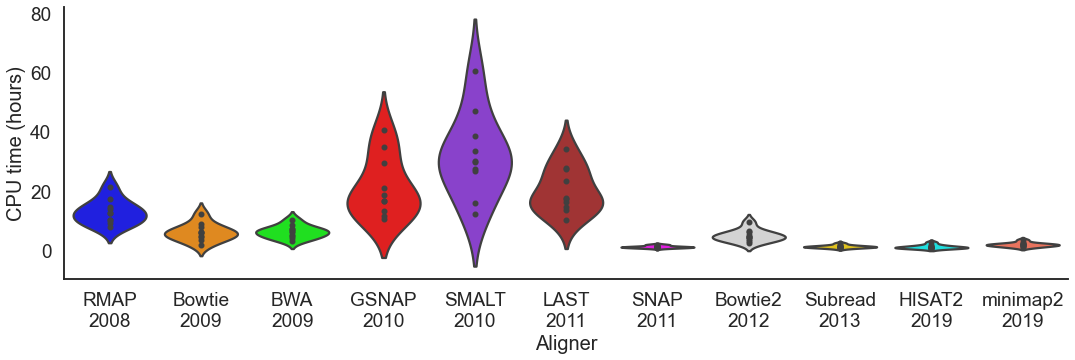

In [6]:
plt.figure(figsize=(18,5))
my_order = rtyear_melt.groupby(by='aligner')[["runtime"]].median()
my_order = my_order.sort_values(by='runtime').index

sns.set_style('white')
sns.set_context('talk')
ax = sns.violinplot(data = rtyear_melt, x = 'aligner', y = 'runtime', scale='width', palette=tool_clrs,#color = "grey"
                   order = order_by_year, inner='points', alpha=.75)

plt.ylabel('CPU time (hours)', fontsize=20)
plt.xlabel('Aligner', fontsize=20)
plt.yticks(fontsize=19)
ax.set_xticklabels(labels=["RMAP\n2008", "Bowtie\n2009", "BWA\n2009", "GSNAP\n2010", "SMALT\n2010", "LAST\n2011", 
                           "SNAP\n2011", "Bowtie2\n2012", "Subread\n2013", "HISAT2\n2019", "minimap2\n2019"], 
                    fontsize=19)
sns.despine()
#plt.show()
plt.savefig('../figures/Figure4_a_0.png', bbox_inches='tight')
plt.savefig('../figures/Figure4_a_0.pdf', bbox_inches='tight')

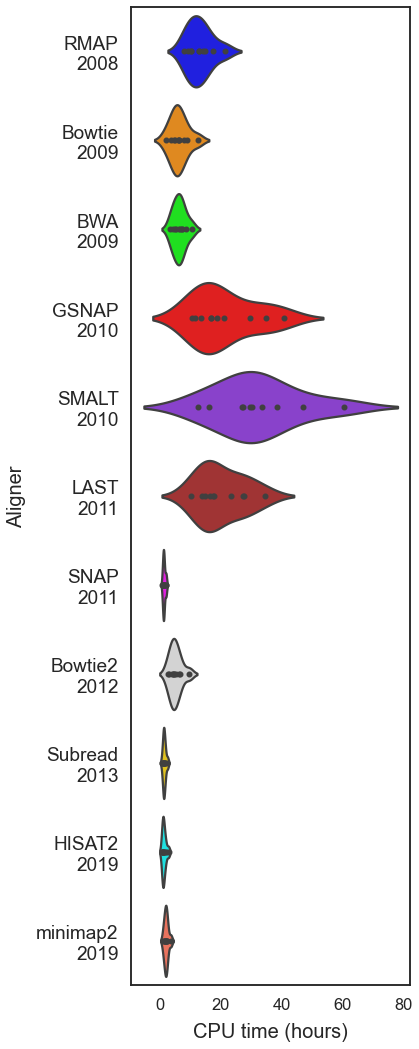

In [7]:
plt.figure(figsize=(5, 18))
my_order = rtyear_melt.groupby(by='aligner')[["runtime"]].median()
my_order = my_order.sort_values(by='runtime').index

sns.set_style('white')
sns.set_context('talk')
ax = sns.violinplot(data = rtyear_melt, y = 'aligner', x = 'runtime', scale='width', palette=tool_clrs,#color = "grey"
                   order = order_by_year, inner='points', alpha=.75)

plt.xlabel('CPU time (hours)', fontsize=20, labelpad=10)
plt.ylabel('Aligner', fontsize=20, labelpad=10)
plt.yticks(fontsize=19)
ax.set_yticklabels(labels=["RMAP\n2008", "Bowtie\n2009", "BWA\n2009", "GSNAP\n2010", "SMALT\n2010", "LAST\n2011", 
                           "SNAP\n2011", "Bowtie2\n2012", "Subread\n2013", "HISAT2\n2019", "minimap2\n2019"], 
                    fontsize=19)
#sns.despine()
plt.savefig('../figures/Figure4_a_2.png', bbox_inches='tight')
plt.savefig('../figures/Figure4_a_2.pdf', bbox_inches='tight')
plt.show()

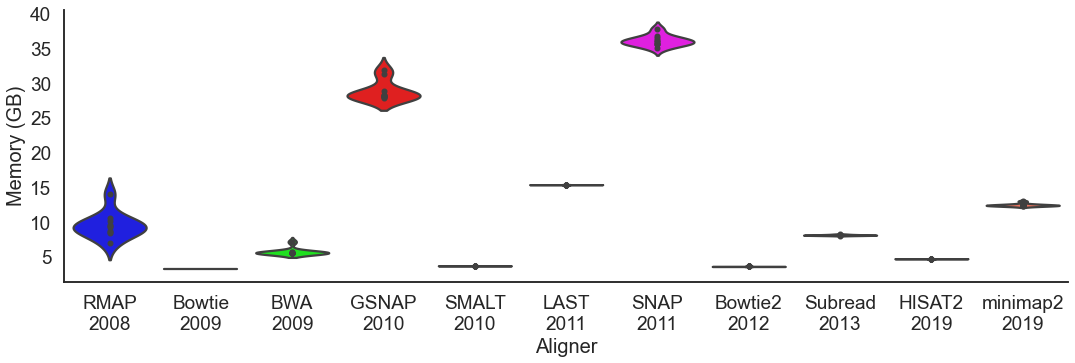

In [8]:
plt.figure(figsize=(18,5))

sns.set_style('white')
sns.set_context('talk')
ax = sns.violinplot(data = memyear_melt, x = 'aligner', y = 'memory', scale='width', palette=tool_clrs,# color="grey",
                    order=order_by_year, inner='points', alpha=.75)

ax.set_xticklabels(#rotation=40, ha="right", 
                   labels=["RMAP\n2008", "Bowtie\n2009", "BWA\n2009", "GSNAP\n2010", "SMALT\n2010", "LAST\n2011", 
                           "SNAP\n2011", "Bowtie2\n2012", "Subread\n2013", "HISAT2\n2019", "minimap2\n2019"], 
                    fontsize=19)

plt.ylabel('Memory (GB)', fontsize=20)
plt.xlabel('Aligner', fontsize=20)
plt.yticks(fontsize=19)
sns.despine()
#plt.show()
plt.savefig('../figures/Figure4_a_1.png', bbox_inches='tight')
plt.savefig('../figures/Figure4_a_1.pdf', bbox_inches='tight')

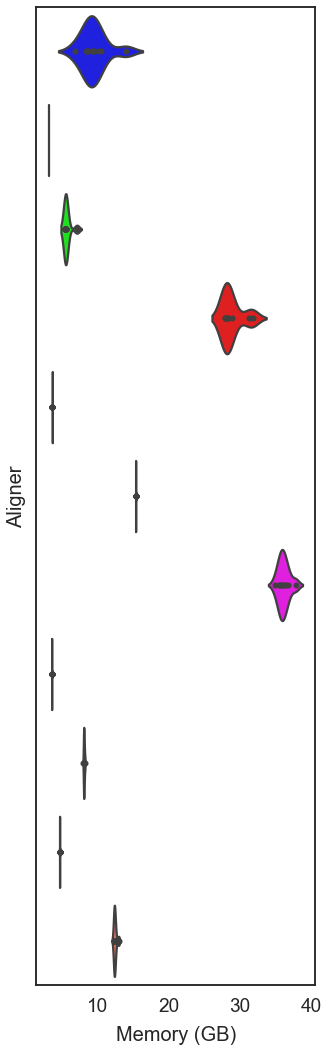

In [9]:
plt.figure(figsize=(5,18))

sns.set_style('white')
sns.set_context('talk')
ax = sns.violinplot(data = memyear_melt, y = 'aligner', x = 'memory', scale='width', palette=tool_clrs,# color="grey",
                    order=order_by_year, inner='points', alpha=.75)

ax.set_yticklabels(#rotation=40, ha="right", 
                   labels=["RMAP\n2008", "Bowtie\n2009", "BWA\n2009", "GSNAP\n2010", "SMALT\n2010", "LAST\n2011", 
                           "SNAP\n2011", "Bowtie2\n2012", "Subread\n2013", "HISAT2\n2019", "minimap2\n2019"], 
                    fontsize=18)

plt.xlabel('Memory (GB)', fontsize=20, labelpad=10)
plt.ylabel('Aligner', fontsize=20, labelpad=10)
plt.xticks(fontsize=19)
plt.yticks([])
#sns.despine()
plt.savefig('../figures/Figure4_a_3.png', bbox_inches='tight')
plt.savefig('../figures/Figure4_a_3.pdf', bbox_inches='tight')
plt.show()

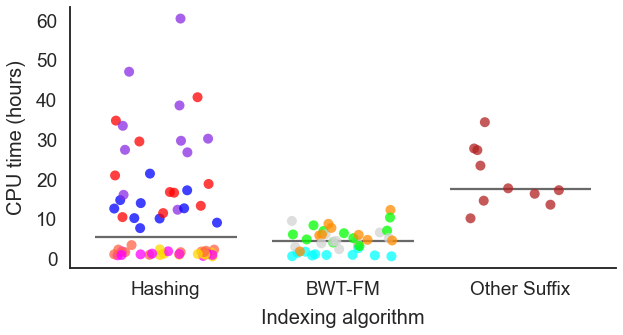

In [10]:
plt.figure(figsize=(9,5))

sns.set_style('white')
sns.set_context('talk')
#ax = sns.boxplot(data = rtyear_melt, x = 'index', y = 'runtime', whis=0,
#                 order=['Hashing','BWT-FM','Other Suffix'], color="1", fliersize=0)

medians = rtyear_melt.groupby('index').median()
upper = rtyear_melt.groupby('index').quantile(q=.75)
lower = rtyear_melt.groupby('index').quantile(q=.25)

ax = sns.stripplot(data = rtyear_melt, x = 'index', y = 'runtime',
                   order=['Hashing','BWT-FM','Other Suffix'], 
                   palette=tool_clrs, hue="aligner", hue_order=order_by_year, size=10, jitter=.3, alpha=.75)


#plt.hlines(upper.loc[upper.index == 'Hashing','runtime'], -.05, .05, color="dimgray", linestyle='solid')
#plt.hlines(lower.loc[lower.index == 'Hashing','runtime'], -.05, .05, color="dimgray", linestyle='solid')
#plt.vlines(0, lower.loc[lower.index == 'Hashing','runtime'], upper.loc[upper.index == 'Hashing','runtime'], 
#           color="dimgray", linestyle='solid')
plt.hlines(medians.loc[medians.index == 'Hashing','runtime'], -.4, .4, color="dimgray", linestyle='solid')
#plt.hlines(upper.loc[upper.index == 'BWT-FM','runtime'], .95, 1.05, color="dimgray", linestyle='solid')
#plt.hlines(lower.loc[lower.index == 'BWT-FM','runtime'], .95, 1.05, color="dimgray", linestyle='solid')
#plt.vlines(1, lower.loc[lower.index == 'BWT-FM','runtime'], upper.loc[upper.index == 'BWT-FM','runtime'], 
#           color="dimgray", linestyle='solid')
plt.hlines(medians.loc[medians.index == 'BWT-FM','runtime'], 0.6, 1.4, color="dimgray", linestyle='solid')
#plt.hlines(upper.loc[upper.index == 'Other Suffix','runtime'], 1.95, 2.05, color="dimgray", linestyle='solid')
#plt.hlines(lower.loc[lower.index == 'Other Suffix','runtime'], 1.95, 2.05, color="dimgray", linestyle='solid')
#plt.vlines(2, lower.loc[lower.index == 'Other Suffix','runtime'], upper.loc[upper.index == 'Other Suffix','runtime'], 
#          color="dimgray", linestyle='solid')
plt.hlines(medians.loc[medians.index == 'Other Suffix','runtime'], 1.6, 2.4, color="dimgray", linestyle='solid')


plt.ylabel('CPU time (hours)', fontsize=20, labelpad=10)
plt.xlabel('Indexing algorithm', fontsize=20, labelpad=10)
plt.yticks(fontsize=19)
plt.xticks(fontsize=19)
ax.legend_.remove()
#leg = plt.legend(title='Aligner', loc='center left', bbox_to_anchor=(1, .5), frameon=False)

sns.despine()
plt.tight_layout()
#plt.show()
plt.savefig('../figures/Figure4_b_0.png', bbox_inches='tight')
plt.savefig('../figures/Figure4_b_0.pdf', bbox_inches='tight')

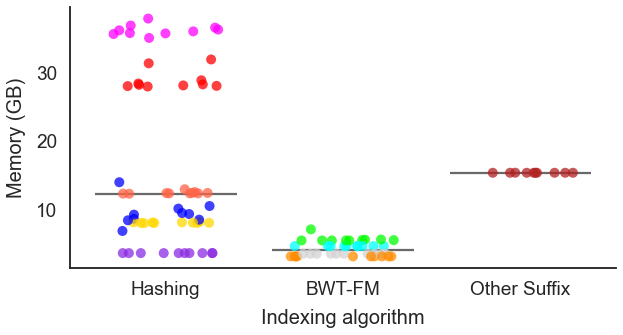

In [11]:
plt.figure(figsize=(9,5))

sns.set_style('white')
sns.set_context('talk')

medians = memyear_melt.groupby('index').median()
upper = memyear_melt.groupby('index').quantile(q=.75)
lower = memyear_melt.groupby('index').quantile(q=.25)

#ax = sns.boxplot(data = memyear_melt, x = 'index', y = 'memory', order=['Hashing','BWT-FM','Other Suffix'],
#                 color="1", fliersize=0, whis=0)
ax = sns.stripplot(data = memyear_melt, x = 'index', y = 'memory', order=['Hashing','BWT-FM','Other Suffix'],
                  palette=tool_clrs, hue="aligner", hue_order=order_by_year, size=10, jitter=.3, alpha=.75)

#plt.hlines(upper.loc[upper.index == 'Hashing','memory'], -.05, .05, color="dimgray", linestyle='solid')
#plt.hlines(lower.loc[lower.index == 'Hashing','memory'], -.05, .05, color="dimgray", linestyle='solid')
#plt.vlines(0, lower.loc[lower.index == 'Hashing','memory'], upper.loc[upper.index == 'Hashing','memory'], 
#           color="dimgray", linestyle='solid')
plt.hlines(medians.loc[medians.index == 'Hashing','memory'], -.4, .4, color="dimgray", linestyle='solid')
#plt.hlines(upper.loc[upper.index == 'BWT-FM','memory'], .95, 1.05, color="dimgray", linestyle='solid')
#plt.hlines(lower.loc[lower.index == 'BWT-FM','memory'], .95, 1.05, color="dimgray", linestyle='solid')
#plt.vlines(1, lower.loc[lower.index == 'BWT-FM','memory'], upper.loc[upper.index == 'BWT-FM','memory'], 
#           color="dimgray", linestyle='solid')
plt.hlines(medians.loc[medians.index == 'BWT-FM','memory'], 0.6, 1.4, color="dimgray", linestyle='solid')
#plt.hlines(upper.loc[upper.index == 'Other Suffix','memory'], 1.95, 2.05, color="dimgray", linestyle='solid')
#plt.hlines(lower.loc[lower.index == 'Other Suffix','memory'], 1.95, 2.05, color="dimgray", linestyle='solid')
#plt.vlines(2, lower.loc[lower.index == 'Other Suffix','memory'], upper.loc[upper.index == 'Other Suffix','memory'], 
#           color="dimgray", linestyle='solid')
plt.hlines(medians.loc[medians.index == 'Other Suffix','memory'], 1.6, 2.4, color="dimgray", linestyle='solid')

plt.ylabel('Memory (GB)', fontsize=20, labelpad=10)
plt.xlabel('Indexing algorithm', fontsize=20, labelpad=10)
plt.yticks(fontsize=19)
plt.xticks(fontsize=19)
ax.legend_.remove()
#leg = plt.legend(title='Aligner', loc='center left', bbox_to_anchor=(1, .5), frameon=False)

plt.tight_layout()
#plt.show()
sns.despine()
plt.savefig('../figures/Figure4_b_1.png', bbox_inches='tight')
plt.savefig('../figures/Figure4_b_1.pdf', bbox_inches='tight')

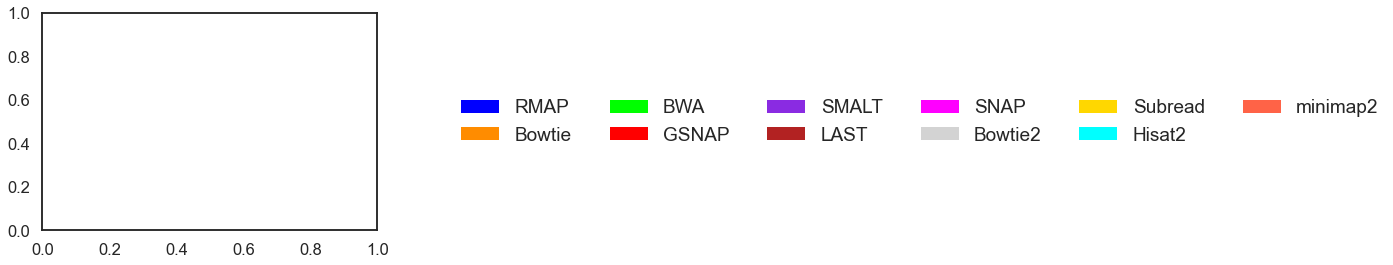

In [21]:
RMAP = plt.Rectangle((0,0),1,1,fc="blue", edgecolor = 'none')
Bowtie = plt.Rectangle((0,0),1,1,fc='darkorange', edgecolor = 'none')
BWA = plt.Rectangle((0,0),1,1,fc='lime', edgecolor = 'none')
GSNAP = plt.Rectangle((0,0),1,1,fc='red', edgecolor = 'none')
SMALT= plt.Rectangle((0,0),1,1,fc='blueviolet', edgecolor = 'none')
LAST = plt.Rectangle((0,0),1,1,fc='firebrick', edgecolor = 'none')
SNAP = plt.Rectangle((0,0),1,1,fc='fuchsia', edgecolor = 'none')
Bowtie2 = plt.Rectangle((0,0),1,1,fc='lightgray', edgecolor = 'none')
Subread = plt.Rectangle((0,0),1,1,fc='gold', edgecolor = 'none')
Hisat2 = plt.Rectangle((0,0),1,1,fc='aqua', edgecolor = 'none')
minimap2 = plt.Rectangle((0,0),1,1,fc='tomato', edgecolor = 'none')

l = plt.legend([RMAP, Bowtie,  BWA, GSNAP, SMALT, LAST,SNAP, Bowtie2, Subread, Hisat2, minimap2], ['RMAP', 'Bowtie',  'BWA', 'GSNAP', 'SMALT', 'LAST','SNAP', 'Bowtie2', 'Subread', 'Hisat2', 'minimap2'], 
               loc = "center left", bbox_to_anchor=(1.2,0.5), ncol = 6, prop={'size':19})
l.draw_frame(False)

plt.savefig('../figures/Figure4_legend.png', bbox_inches='tight')

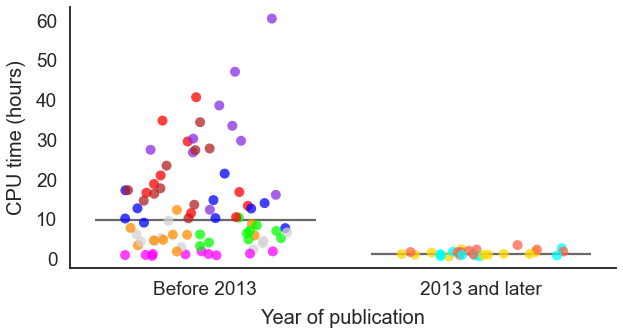

In [29]:
plt.figure(figsize=(9,5))

sns.set_style('white')
sns.set_context('talk')

medians = rtyear_melt.groupby('year_split').median()
upper = rtyear_melt.groupby('year_split').quantile(q=.75)
lower = rtyear_melt.groupby('year_split').quantile(q=.25)


# ax = sns.boxplot(data = rtyear_melt, x = 'year_split', y = 'runtime', whis=0,
#                  order = ['Before 2013', '2013 and later'], color="1", fliersize = 0)
ax = sns.stripplot(data= rtyear_melt, x = 'year_split', y = 'runtime', order=['Before 2013','2013 and later'],
                   palette=tool_clrs, hue="aligner", hue_order=order_by_year, size=10, jitter=.3, alpha=.75)

#plt.hlines(upper.loc[upper.index == 'Before 2013','runtime'], -.05, .05, color="dimgray", linestyle='solid')
#plt.hlines(lower.loc[lower.index == 'Before 2013','runtime'], -.05, .05, color="dimgray", linestyle='solid')
#plt.vlines(0, lower.loc[lower.index == 'Before 2013','runtime'], upper.loc[upper.index == 'Before 2013','runtime'], 
#           color="dimgray", linestyle='solid')
plt.hlines(medians.loc[medians.index == 'Before 2013','runtime'], -.4, .4, color="dimgray", linestyle='solid')
#plt.hlines(upper.loc[upper.index == '2013 and later','runtime'], .95, 1.05, color="dimgray", linestyle='solid')
#plt.hlines(lower.loc[lower.index == '2013 and later','runtime'], .95, 1.05, color="dimgray", linestyle='solid')
#plt.vlines(1, lower.loc[lower.index == '2013 and later','runtime'], upper.loc[upper.index == '2013 and later','runtime'], 
#           color="dimgray", linestyle='solid')
plt.hlines(medians.loc[medians.index == '2013 and later','runtime'], 0.6, 1.4, color="dimgray", linestyle='solid')

plt.ylabel('CPU time (hours)', fontsize=20, labelpad=10)
plt.xlabel('Year of publication', fontsize=20, labelpad=10)
plt.yticks(fontsize=19)
plt.xticks(fontsize=19)
ax.legend_.remove()
#leg = plt.legend(title='Aligner', loc='center left', bbox_to_anchor=(1, .5), frameon=False)
plt.tight_layout()
sns.despine()

#plt.show()
plt.savefig('../figures/Figure4_c_0.png', bbox_inches='tight')
plt.savefig('../figures/Figure4_c_0.pdf', bbox_inches='tight')

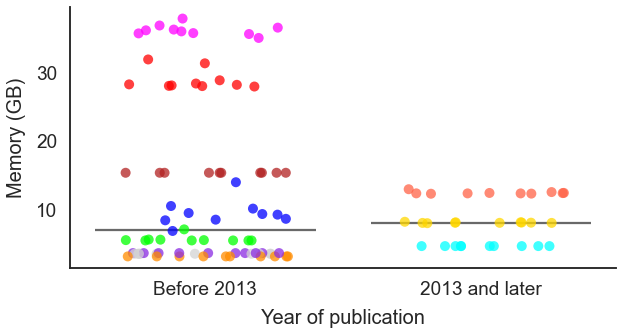

In [30]:
plt.figure(figsize=(9,5))

sns.set_style('white')
sns.set_context('talk')

medians = memyear_melt.groupby('year_split').median()
upper = memyear_melt.groupby('year_split').quantile(q=.75)
lower = memyear_melt.groupby('year_split').quantile(q=.25)

# ax = sns.boxplot(data = memyear_melt, x = 'year_split', y = 'memory', whis=0, fliersize=0,
#                  order = ['Before 2013', '2013 and later'], color="1")
ax = sns.stripplot(data = memyear_melt, x = 'year_split', y = 'memory', order=['Before 2013','2013 and later'],
                   palette=tool_clrs, hue="aligner", hue_order=order_by_year, size=10, jitter=.3, alpha=.75)

#plt.hlines(upper.loc[upper.index == 'Before 2013','memory'], -.05, .05, color="dimgray", linestyle='solid')
#plt.hlines(lower.loc[lower.index == 'Before 2013','memory'], -.05, .05, color="dimgray", linestyle='solid')
#plt.vlines(0, lower.loc[lower.index == 'Before 2013','memory'], upper.loc[upper.index == 'Before 2013','memory'], 
#           color="dimgray", linestyle='solid')
plt.hlines(medians.loc[medians.index == 'Before 2013','memory'], -.4, .4, color="dimgray", linestyle='solid')
#plt.hlines(upper.loc[upper.index == '2013 and later','memory'], .95, 1.05, color="dimgray", linestyle='solid')
#plt.hlines(lower.loc[lower.index == '2013 and later','memory'], .95, 1.05, color="dimgray", linestyle='solid')
#plt.vlines(1, lower.loc[lower.index == '2013 and later','memory'], upper.loc[upper.index == '2013 and later','memory'], 
#           color="dimgray", linestyle='solid')
plt.hlines(medians.loc[medians.index == '2013 and later','memory'], 0.6, 1.4, color="dimgray", linestyle='solid')

plt.ylabel('Memory (GB)', fontsize=20, labelpad=10)
plt.xlabel('Year of publication', fontsize=20, labelpad=10)
plt.yticks(fontsize=19)
plt.xticks(fontsize=19)
ax.legend_.remove()
#leg = plt.legend(title='Aligner', loc='center left', bbox_to_anchor=(1, .5), frameon=False)
plt.tight_layout()
#plt.show()
sns.despine()

plt.savefig('../figures/Figure4_c_1.png', bbox_inches='tight')
plt.savefig('../figures/Figure4_c_1.pdf', bbox_inches='tight')

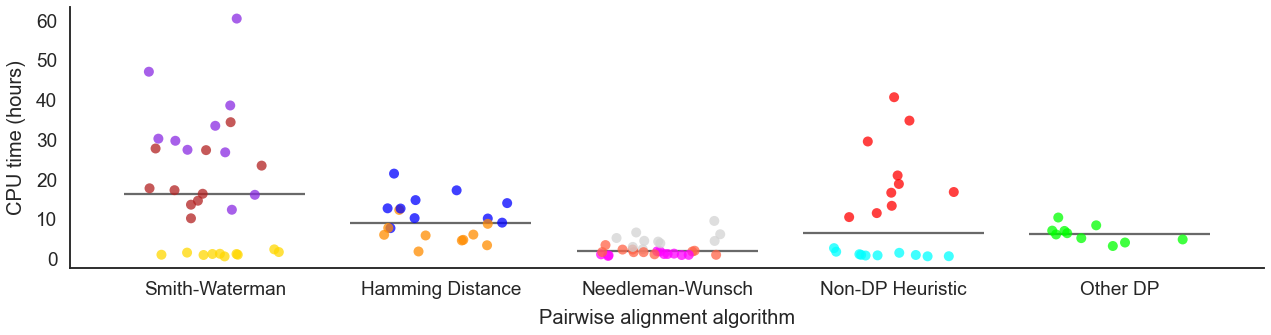

In [28]:
plt.figure(figsize=(18,5))

sns.set_style('white')
sns.set_context('talk')

medians = rtyear_melt.groupby('pairwise').median()
upper = rtyear_melt.groupby('pairwise').quantile(q=.75)
lower = rtyear_melt.groupby('pairwise').quantile(q=.25)


#ax = sns.boxplot(data = rtyear_melt, x = 'pairwise', y = 'runtime', 
#                 order=['Smith-Waterman','Hamming Distance','Needleman-Wunsch','Non-DP Heuristic'], 
#                 fliersize=0, color="1", whis=0)
ax = sns.stripplot(data = rtyear_melt, x = 'pairwise', y = 'runtime', 
                   order=['Smith-Waterman','Hamming Distance','Needleman-Wunsch','Non-DP Heuristic', 'Other DP'],
                   hue="aligner", hue_order=order_by_year, palette=tool_clrs, size=10, jitter=.3, alpha=.75)

#plt.hlines(upper.loc[upper.index == 'Smith-Waterman','runtime'], -.05, .05, color="dimgray", linestyle='solid')
#plt.hlines(lower.loc[lower.index == 'Smith-Waterman','runtime'], -.05, .05, color="dimgray", linestyle='solid')
#plt.vlines(0, lower.loc[lower.index == 'Smith-Waterman','runtime'], upper.loc[upper.index == 'Smith-Waterman','runtime'], 
#           color="dimgray", linestyle='solid')
plt.hlines(medians.loc[medians.index == 'Smith-Waterman','runtime'], -.4, .4, color="dimgray", linestyle='solid')
#plt.hlines(upper.loc[upper.index == 'Hamming Distance','runtime'], .95, 1.05, color="dimgray", linestyle='solid')
#plt.hlines(lower.loc[lower.index == 'Hamming Distance','runtime'], .95, 1.05, color="dimgray", linestyle='solid')
#plt.vlines(1, lower.loc[lower.index == 'Hamming Distance','runtime'], upper.loc[upper.index == 'Hamming Distance','runtime'], 
#           color="dimgray", linestyle='solid')
plt.hlines(medians.loc[medians.index == 'Hamming Distance','runtime'], 0.6, 1.4, color="dimgray", linestyle='solid')
#plt.hlines(upper.loc[upper.index == 'Needleman-Wunsch','runtime'], 1.95, 2.05, color="dimgray", linestyle='solid')
#plt.hlines(lower.loc[lower.index == 'Needleman-Wunsch','runtime'], 1.95, 2.05, color="dimgray", linestyle='solid')
#plt.vlines(2, lower.loc[lower.index == 'Needleman-Wunsch','runtime'], upper.loc[upper.index == 'Needleman-Wunsch','runtime'], 
#           color="dimgray", linestyle='solid')
plt.hlines(medians.loc[medians.index == 'Needleman-Wunsch','runtime'], 1.6, 2.4, color="dimgray", linestyle='solid')
#plt.hlines(upper.loc[upper.index == 'Non-DP Heuristic','runtime'], 2.95, 3.05, color="dimgray", linestyle='solid')
#plt.hlines(lower.loc[lower.index == 'Non-DP Heuristic','runtime'], 2.95, 3.05, color="dimgray", linestyle='solid')
#plt.vlines(3, lower.loc[lower.index == 'Non-DP Heuristic','runtime'], upper.loc[upper.index == 'Non-DP Heuristic','runtime'], 
#           color="dimgray", linestyle='solid')
plt.hlines(medians.loc[medians.index == 'Non-DP Heuristic','runtime'], 2.6, 3.4, color="dimgray", linestyle='solid')
#plt.hlines(upper.loc[upper.index == 'Other DP','runtime'], 3.95, 4.05, color="dimgray", linestyle='solid')
#plt.hlines(lower.loc[lower.index == 'Other DP','runtime'], 3.95, 4.05, color="dimgray", linestyle='solid')
#plt.vlines(3, lower.loc[lower.index == 'Other DP','runtime'], upper.loc[upper.index == 'Other DP','runtime'], 
#          color="dimgray", linestyle='solid')
plt.hlines(medians.loc[medians.index == 'Other DP','runtime'], 3.6, 4.4, color="dimgray", linestyle='solid')

plt.ylabel('CPU time (hours)', fontsize=20, labelpad=10)
plt.xlabel('Pairwise alignment algorithm', fontsize=20, labelpad=10)
plt.yticks(fontsize=19)
plt.xticks(fontsize=19)
#leg = plt.legend(title='Aligner', loc='center left', bbox_to_anchor=(1, .5), frameon=False)
ax.legend_.remove()

plt.tight_layout()
#plt.show()
sns.despine()
plt.savefig('../figures/Figure4_d_0.png', bbox_inches='tight')
plt.savefig('../figures/Figure4_d_0.pdf', bbox_inches='tight')

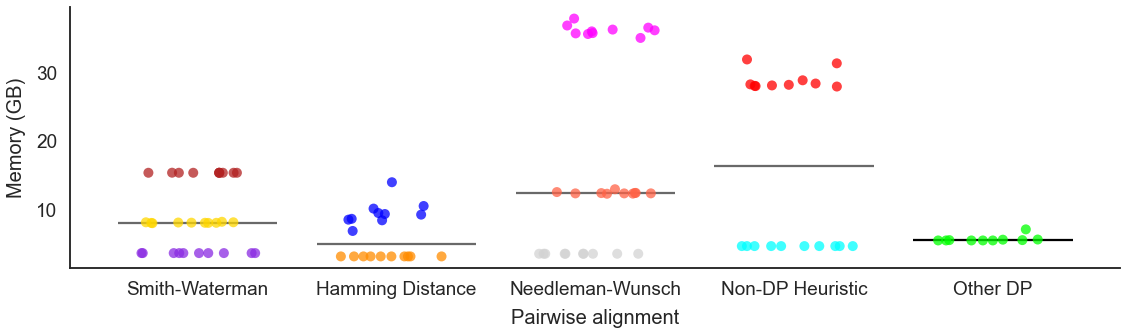

In [27]:
plt.figure(figsize=(18,5))

sns.set_style('white')
sns.set_context('talk')

medians = memyear_melt.groupby('pairwise').median()
upper = memyear_melt.groupby('pairwise').quantile(q=.75)
lower = memyear_melt.groupby('pairwise').quantile(q=.25)


#ax = sns.boxplot(data = memyear_melt, x = 'pairwise', y = 'memory',
#                 order=['Smith-Waterman','Hamming Distance','Needleman-Wunsch','Non-DP Heuristic'], 
#                 color="1", fliersize=0, whis=0) 
ax = sns.stripplot(data = memyear_melt, x = 'pairwise', y = 'memory', 
                   order=['Smith-Waterman','Hamming Distance','Needleman-Wunsch','Non-DP Heuristic', 'Other DP'],
                   hue="aligner", hue_order=order_by_year, palette=tool_clrs, size=10, jitter=.3, alpha=.75)

#plt.hlines(upper.loc[upper.index == 'Smith-Waterman','memory'], -.05, .05, color="dimgray", linestyle='solid')
#plt.hlines(lower.loc[lower.index == 'Smith-Waterman','memory'], -.05, .05, color="dimgray", linestyle='solid')
#plt.vlines(0, lower.loc[lower.index == 'Smith-Waterman','memory'], upper.loc[upper.index == 'Smith-Waterman','memory'], 
#           color="dimgray", linestyle='solid')
plt.hlines(medians.loc[medians.index == 'Smith-Waterman','memory'], -.4, .4, color="dimgray", linestyle='solid')
#plt.hlines(upper.loc[upper.index == 'Hamming Distance','memory'], .95, 1.05, color="dimgray", linestyle='solid')
#plt.hlines(lower.loc[lower.index == 'Hamming Distance','memory'], .95, 1.05, color="dimgray", linestyle='solid')
#plt.vlines(1, lower.loc[lower.index == 'Hamming Distance','memory'], upper.loc[upper.index == 'Hamming Distance','memory'], 
#           color="dimgray", linestyle='solid')
plt.hlines(medians.loc[medians.index == 'Hamming Distance','memory'], 0.6, 1.4, color="dimgray", linestyle='solid')
#plt.hlines(upper.loc[upper.index == 'Needleman-Wunsch','memory'], 1.95, 2.05, color="dimgray", linestyle='solid')
#plt.hlines(lower.loc[lower.index == 'Needleman-Wunsch','memory'], 1.95, 2.05, color="dimgray", linestyle='solid')
#plt.vlines(2, lower.loc[lower.index == 'Needleman-Wunsch','memory'], upper.loc[upper.index == 'Needleman-Wunsch','memory'], 
#           color="dimgray", linestyle='solid')
plt.hlines(medians.loc[medians.index == 'Needleman-Wunsch','memory'], 1.6, 2.4, color="dimgray", linestyle='solid')
#plt.hlines(upper.loc[upper.index == 'Non-DP Heuristic','memory'], 2.95, 3.05, color="dimgray", linestyle='solid')
#plt.hlines(lower.loc[lower.index == 'Non-DP Heuristic','memory'], 2.95, 3.05, color="dimgray", linestyle='solid')
#plt.vlines(3, lower.loc[lower.index == 'Non-DP Heuristic','memory'], upper.loc[upper.index == 'Non-DP Heuristic','memory'], 
#           color="dimgray", linestyle='solid')
plt.hlines(medians.loc[medians.index == 'Non-DP Heuristic','memory'], 2.6, 3.4, color="dimgray", linestyle='solid')
#plt.hlines(upper.loc[upper.index == 'Other DP','memory'], 3.95, 4.05, color="dimgray", linestyle='solid')
#plt.hlines(lower.loc[lower.index == 'Other DP','memory'], 3.95, 4.05, color="dimgray", linestyle='solid')
#plt.vlines(3, lower.loc[lower.index == 'Other DP','memory'], upper.loc[upper.index == 'Other DP','memory'], 
#           color="dimgray", linestyle='solid')
plt.hlines(medians.loc[medians.index == 'Other DP','memory'], 3.6, 4.4, color="black", linestyle='solid')

plt.ylabel('Memory (GB)', fontsize=20, labelpad=10)
plt.xlabel('Pairwise alignment', fontsize=20, labelpad=10)
plt.yticks(fontsize=19)
plt.xticks(fontsize=19)
#leg = plt.legend(title='Aligner', loc='center left', bbox_to_anchor=(1, .5), frameon=False)
ax.legend_.remove()

plt.tight_layout()
#plt.show()
sns.despine()

plt.savefig('../figures/Figure4_d_1.png', bbox_inches='tight')
plt.savefig('../figures/Figure4_d_1.pdf', bbox_inches='tight')